Data parsing program written to look through a CSV where each row is comprised of metadata about BitCoin transactions. The output is a series of graphs measuring changes in certain pieces of metadata over time. Each graph contains transactions ocurring during a particular month, sorted by date. Blue data points are legitimate transactions, red data points were predetermined to be malicious transactions. 

Written by David Rudenya for the cybersecurity undergraduate research project with Dr. Nwanze of North Central College

In [3]:
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import auth
import gspread
from oauth2client.client import GoogleCredentials


In [4]:
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('sorted_by_date-time_api').sheet1

# get_all_values gives a list of rows
# this is the data to process
rows = worksheet.get_all_values()

In [5]:
# the values that will act as the dependent variable in the chart
# each row in the rows list is arranged in this order
# the hashes and dates in the file are intentionally ignored because they 
# will not act as independent variables
values = ["vin_sz","vout_sz","size","weight","fee","time","block_index","block_height","out-0-value","out-1-value","prev_out_value","tx_index","out-0-spending_outpoints","out-1-spending_outpoints"]


In [13]:
file = files.upload()

# due to the way Google Colab formats uploaded files, the below code
# is used to access the file bytestream
hashes = file['malicious_hashes.txt'].decode().split('\n')

# remove the trailing newline that is added to the list as the final entry
hashes = hashes[:len(hashes)-1]

Saving malicious_hashes.txt to malicious_hashes (1).txt


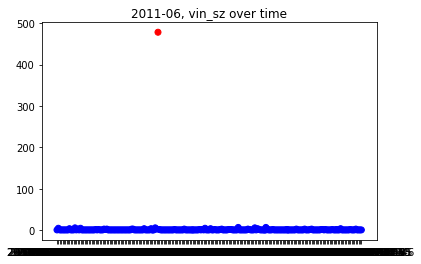

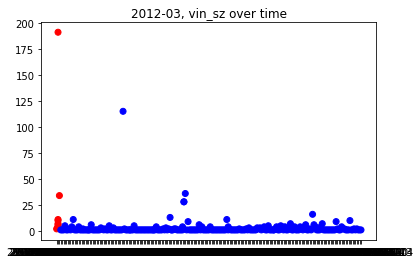

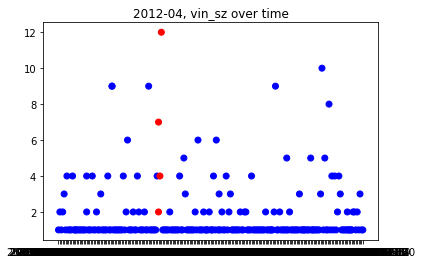

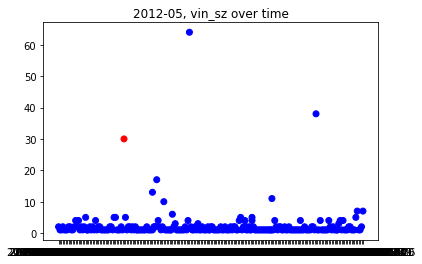

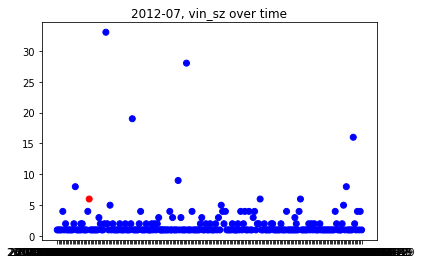

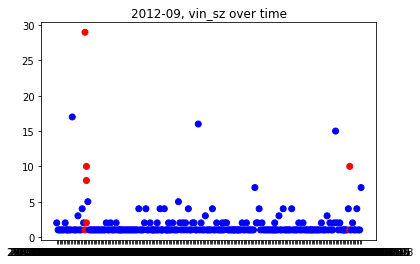

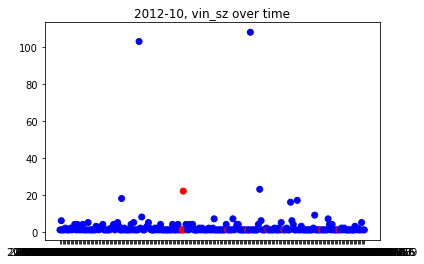

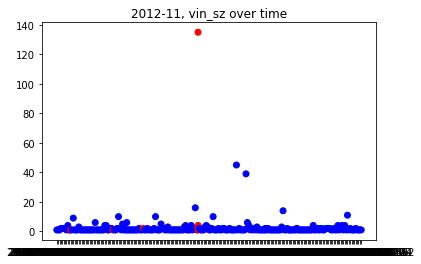

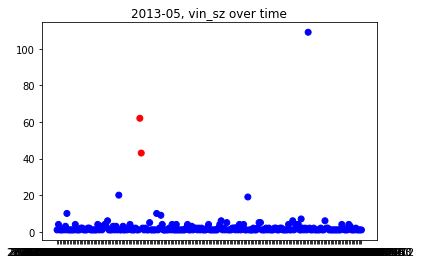

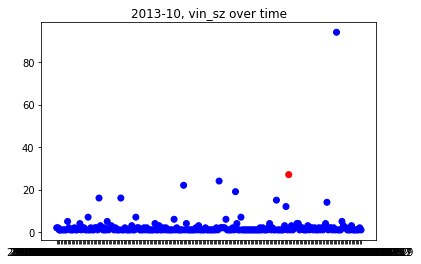

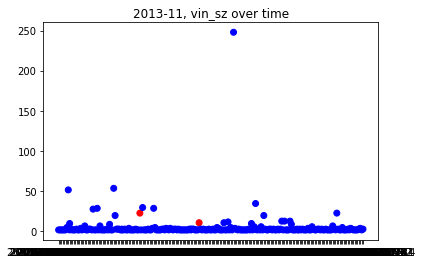

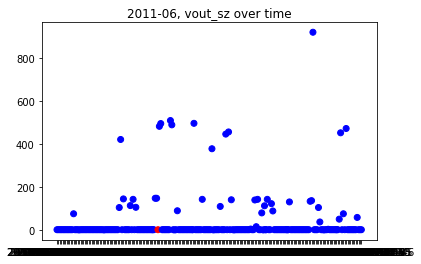

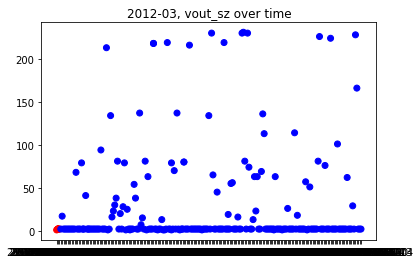

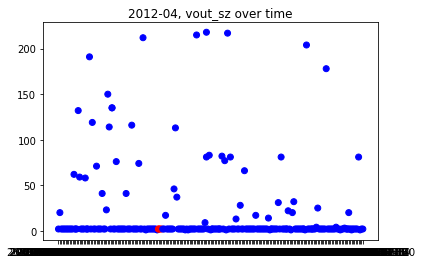

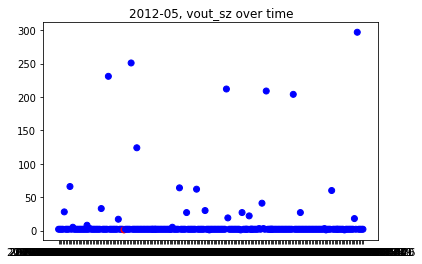

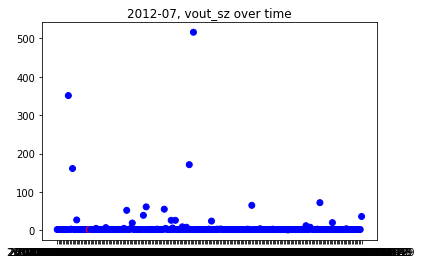

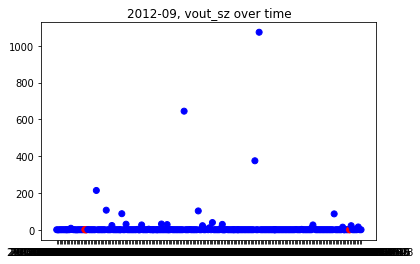

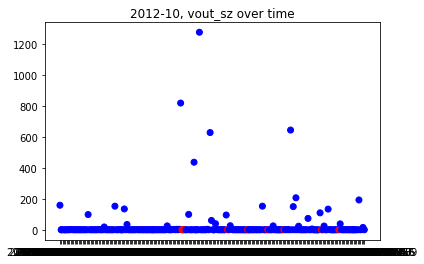

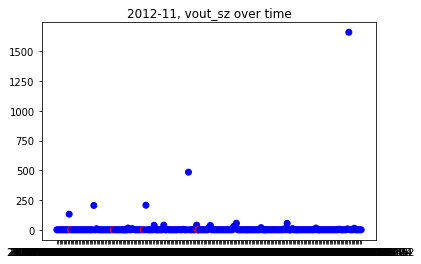

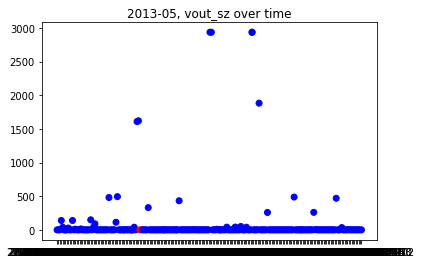

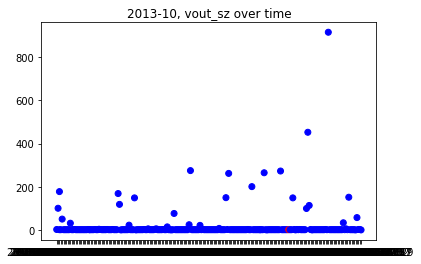

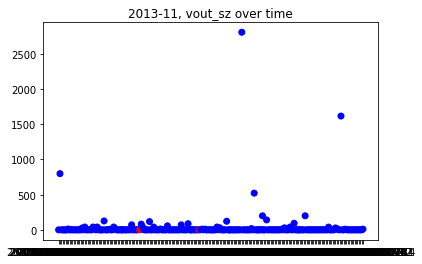

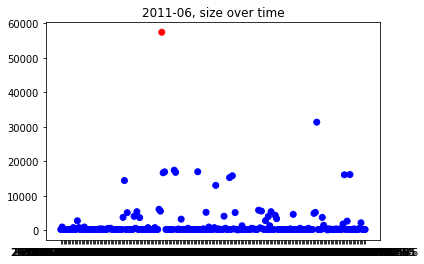

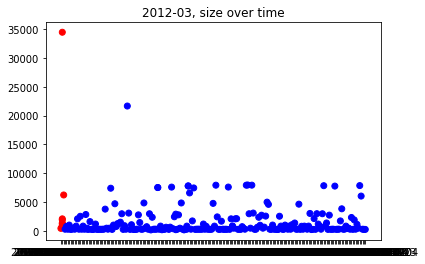

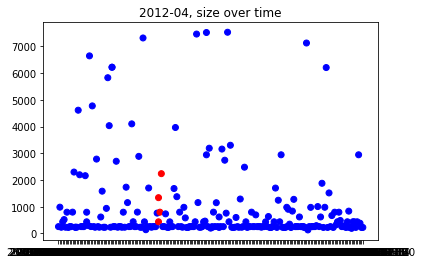

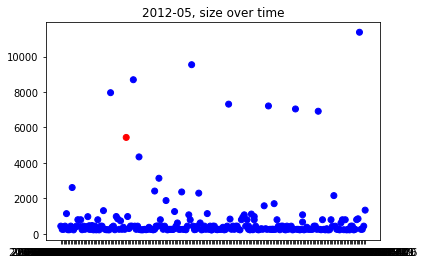

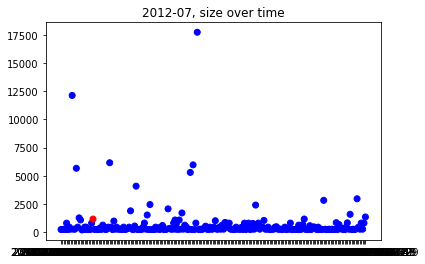

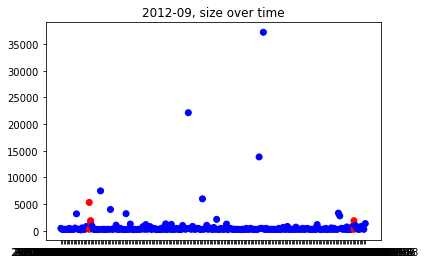

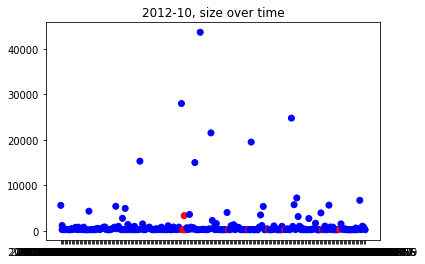

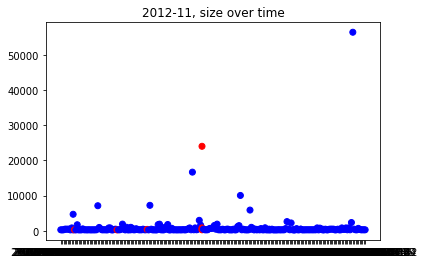

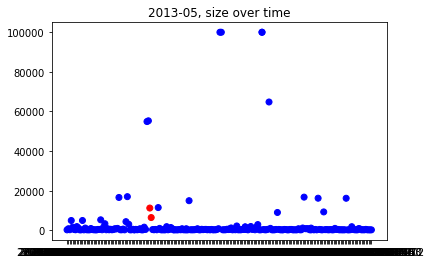

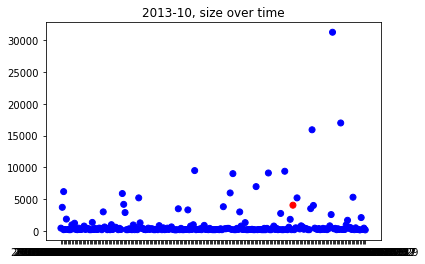

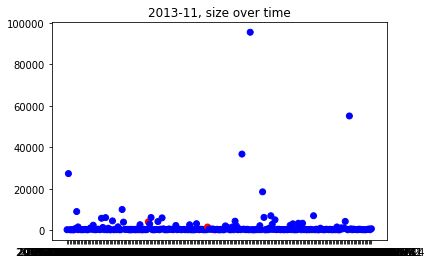

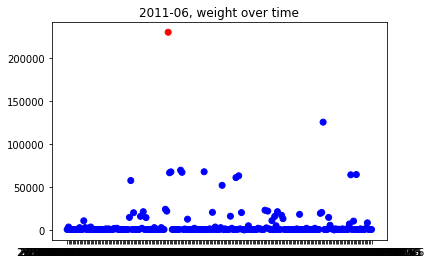

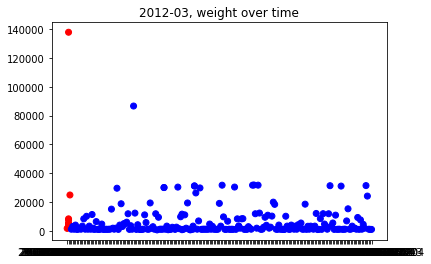

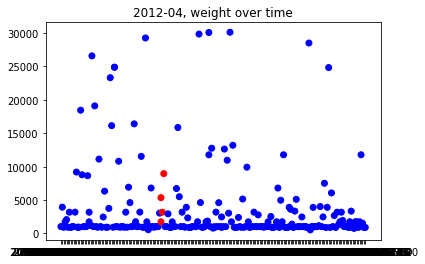

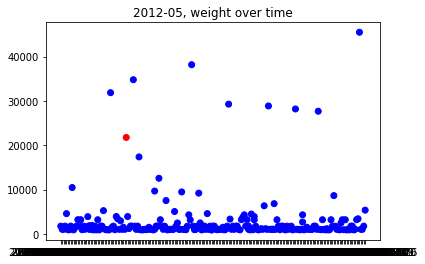

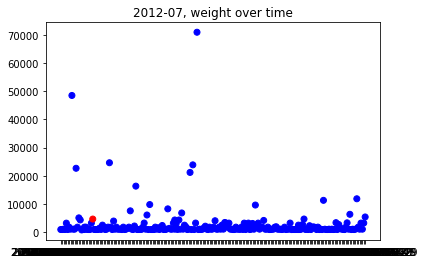

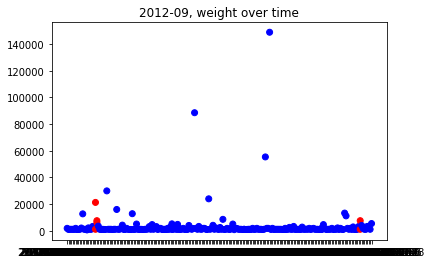

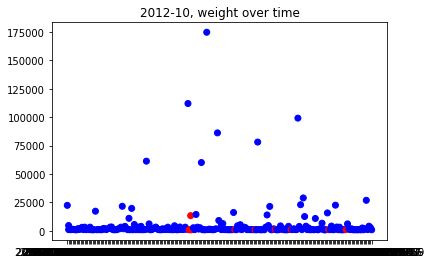

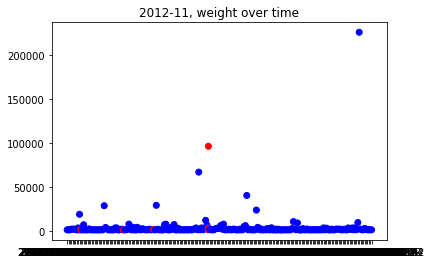

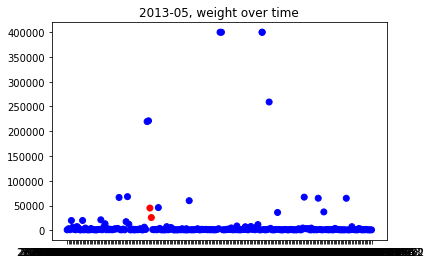

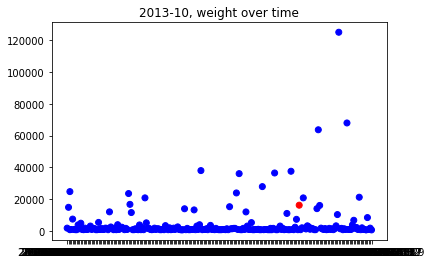

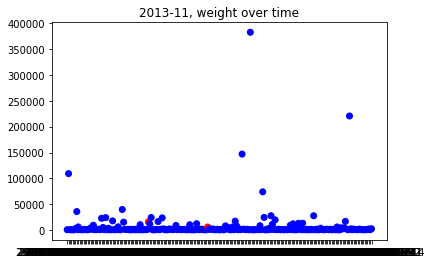

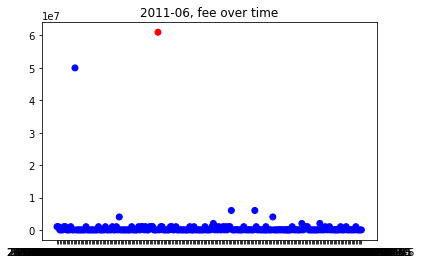

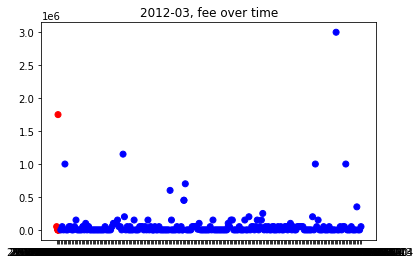

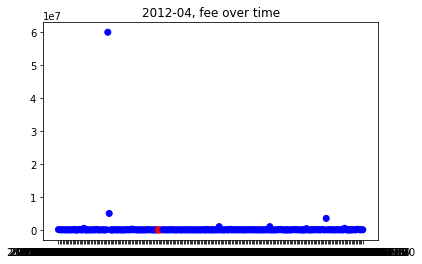

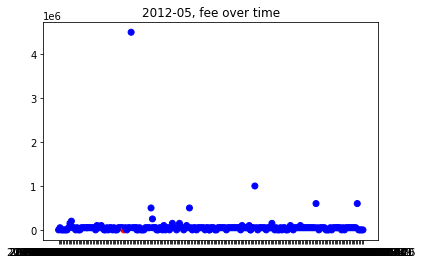

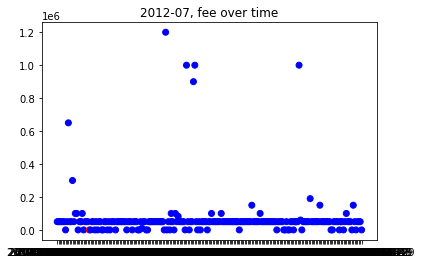

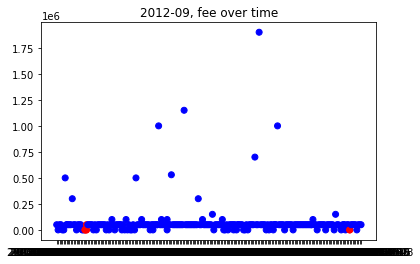

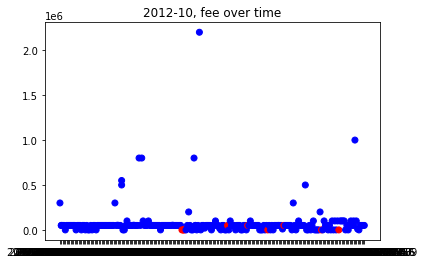

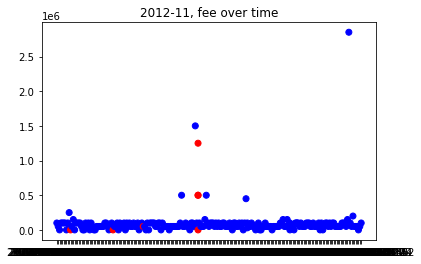

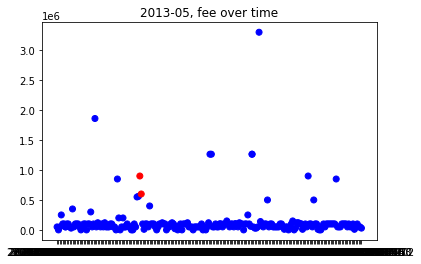

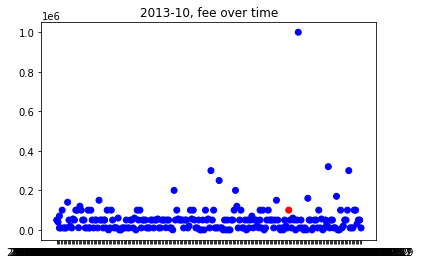

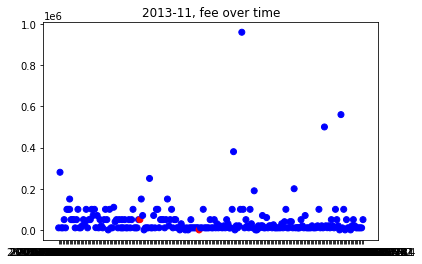

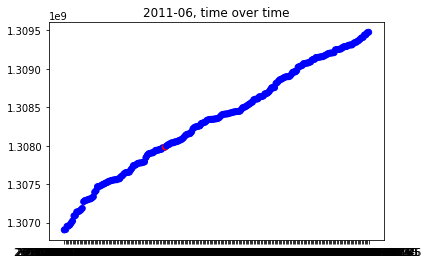

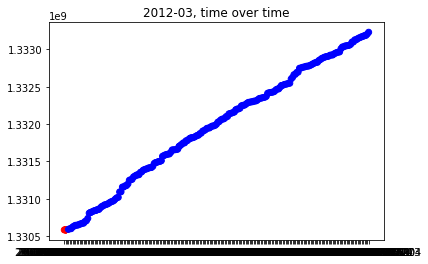

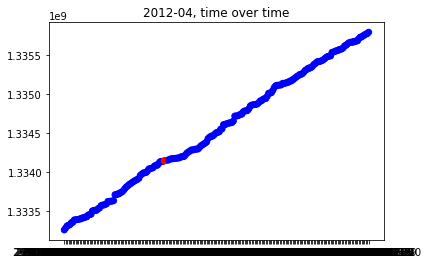

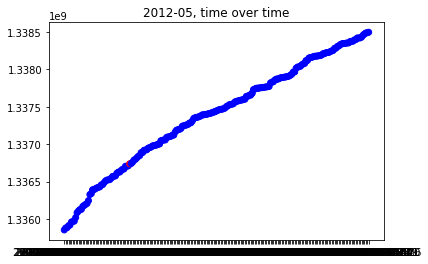

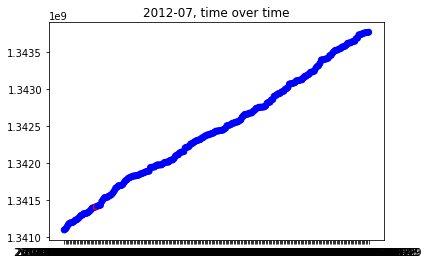

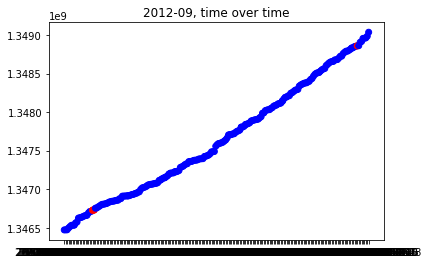

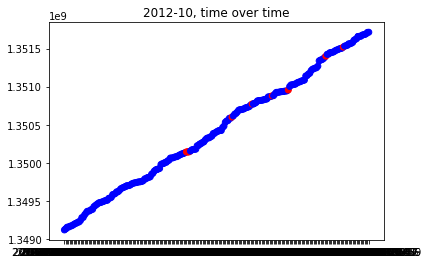

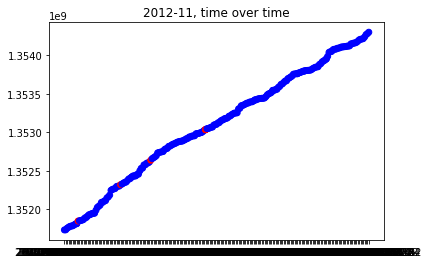

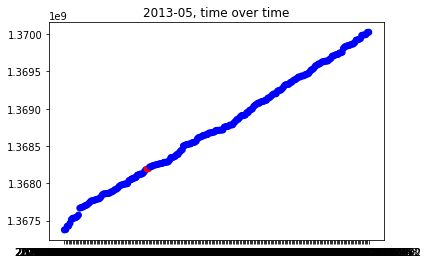

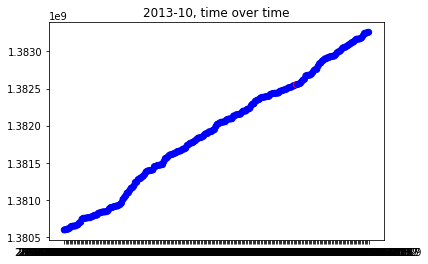

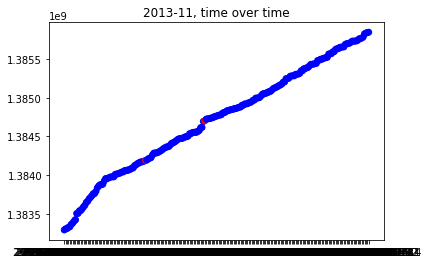

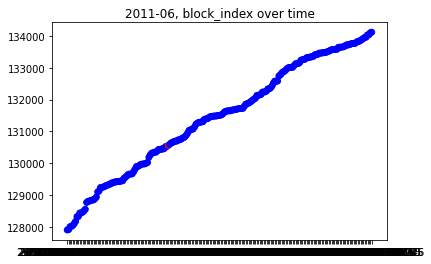

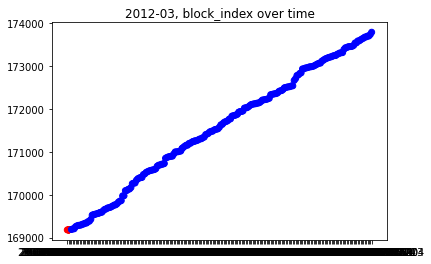

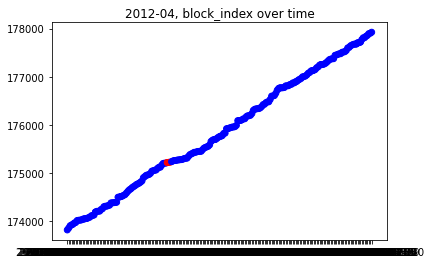

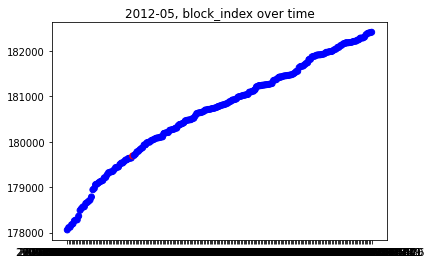

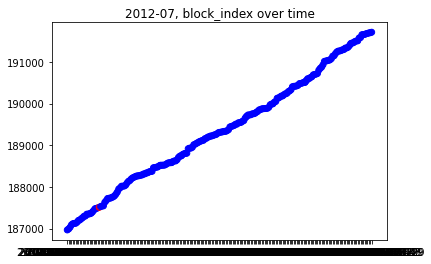

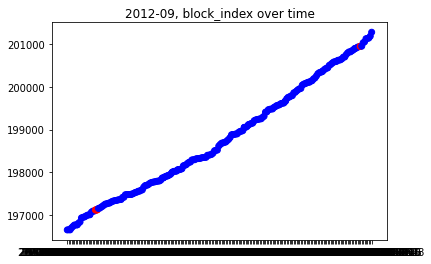

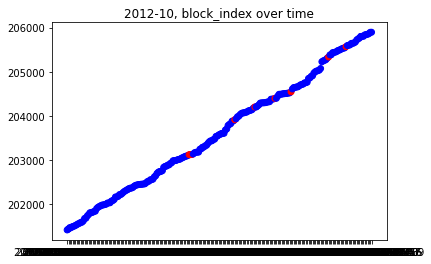

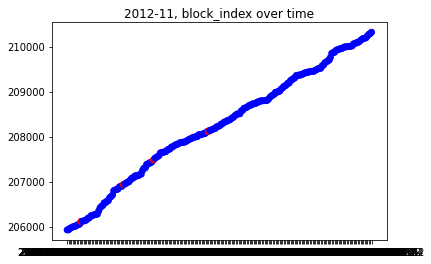

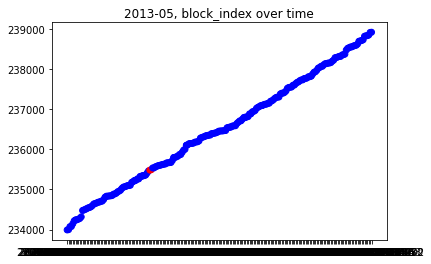

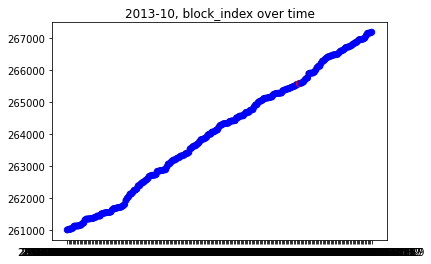

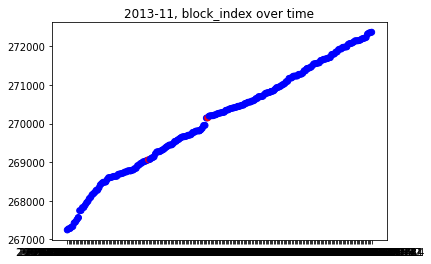

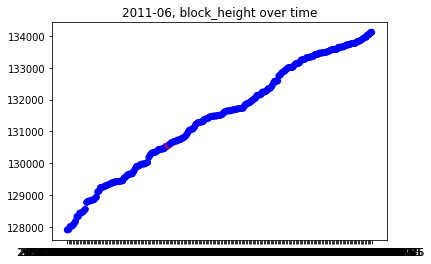

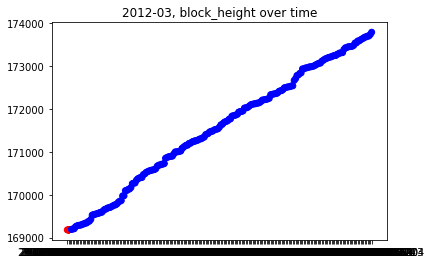

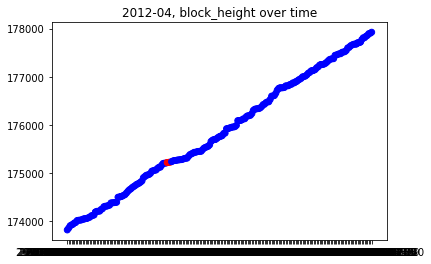

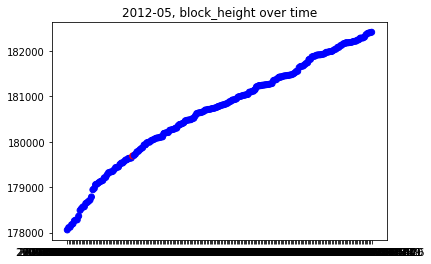

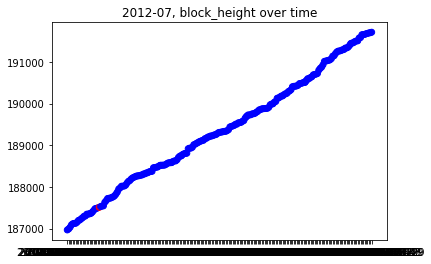

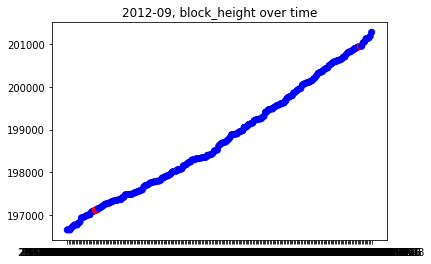

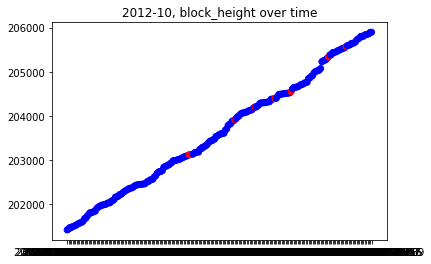

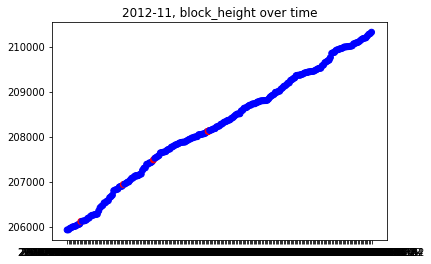

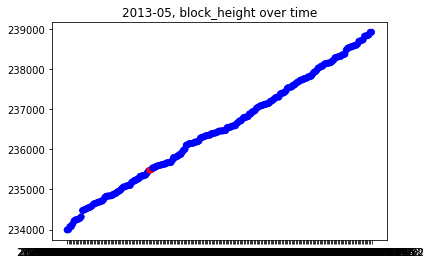

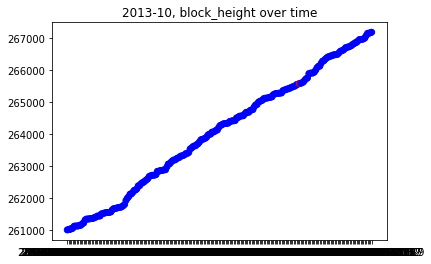

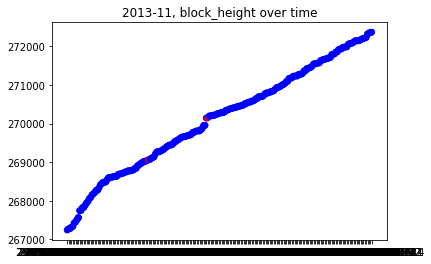

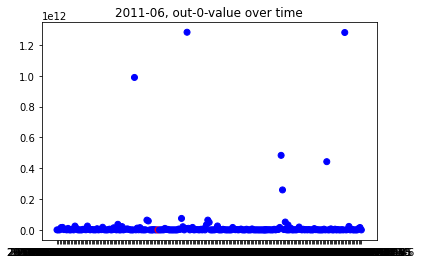

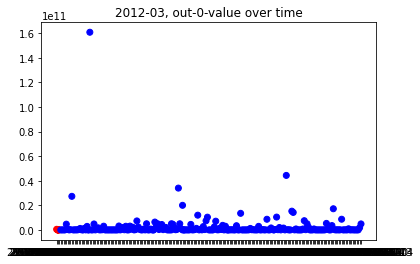

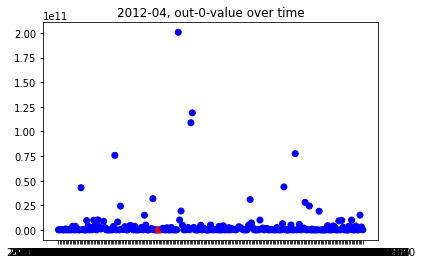

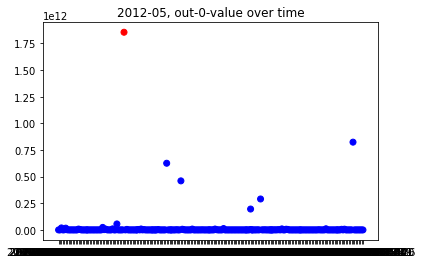

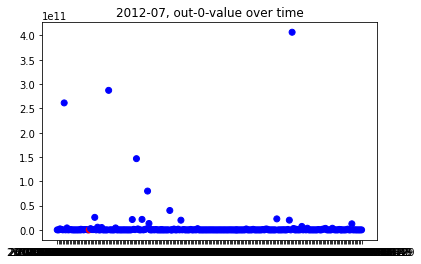

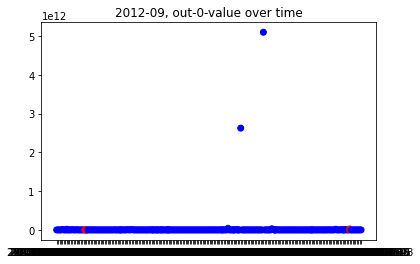

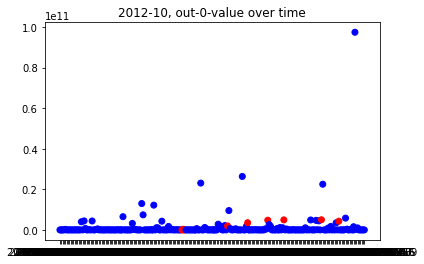

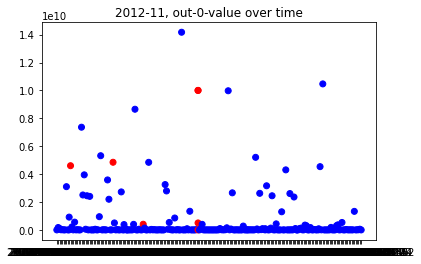

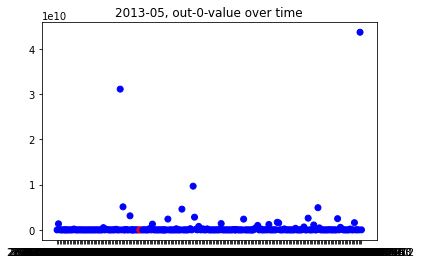

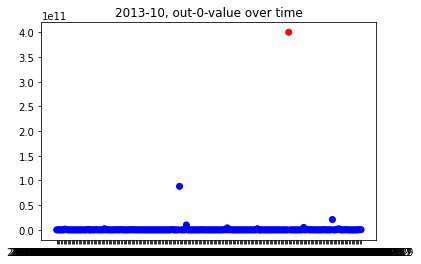

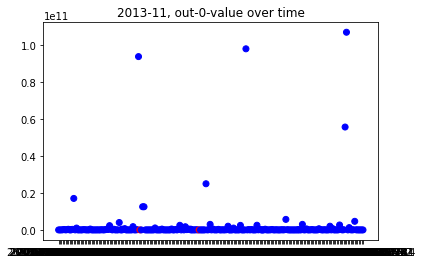

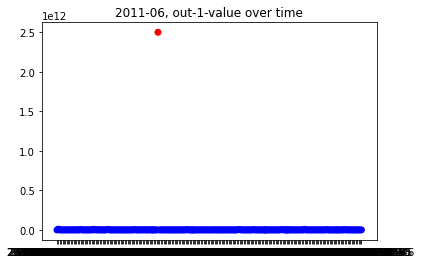

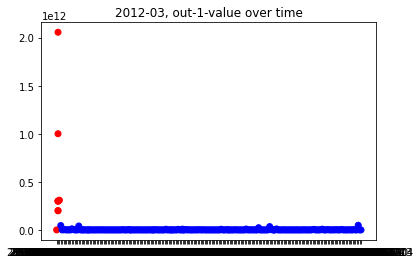

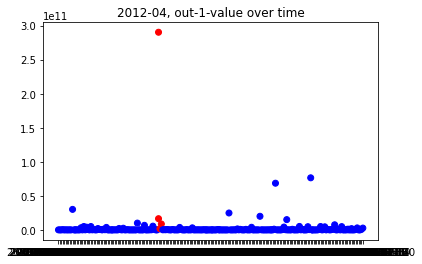

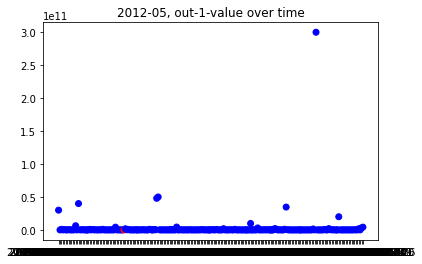

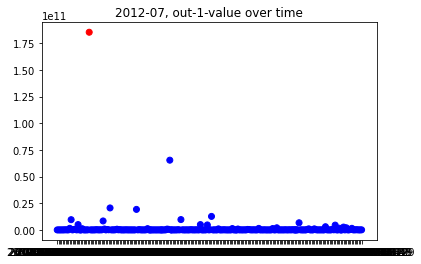

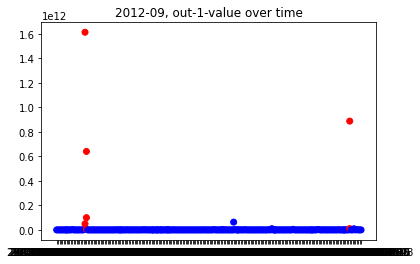

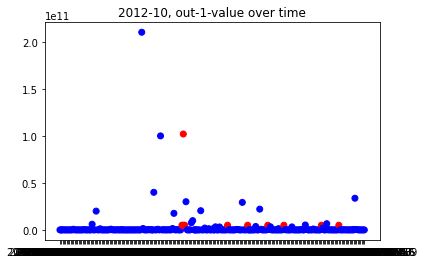

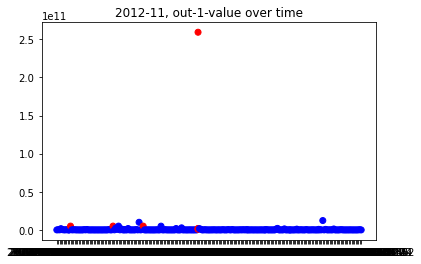

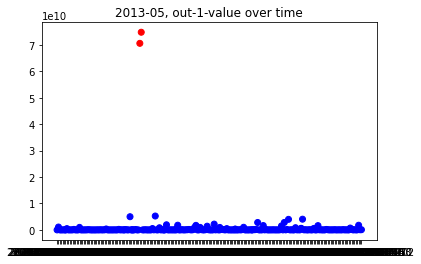

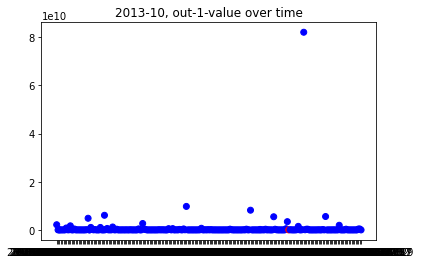

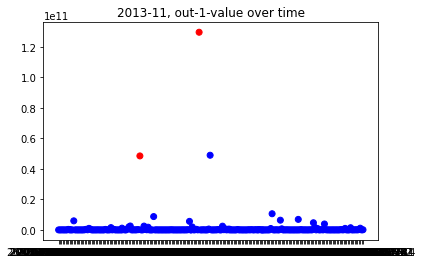

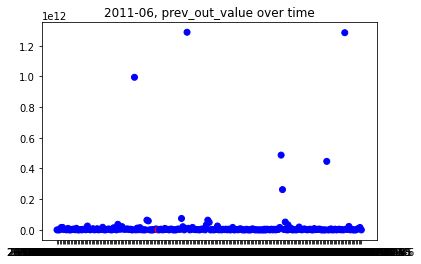

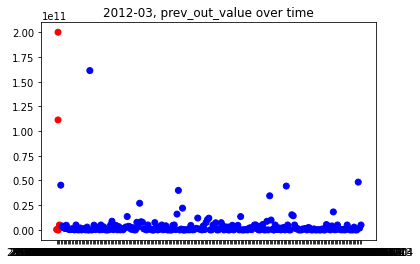

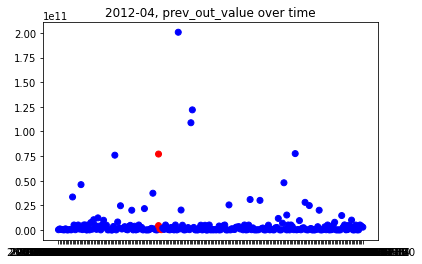

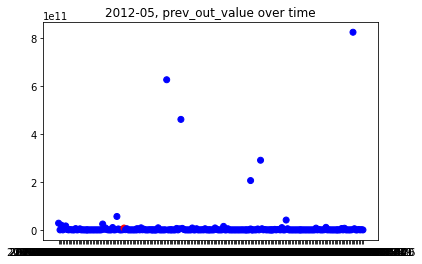

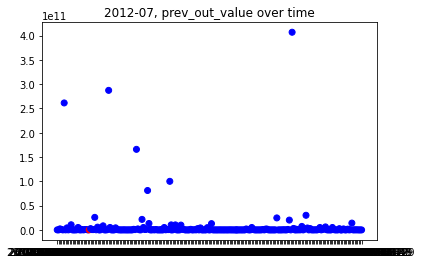

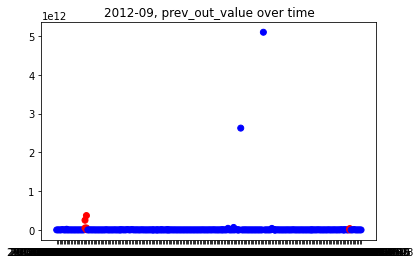

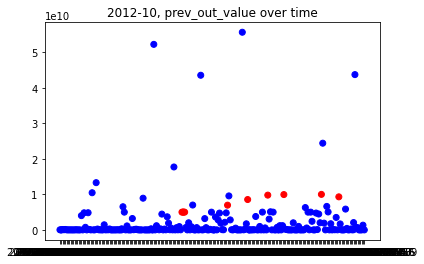

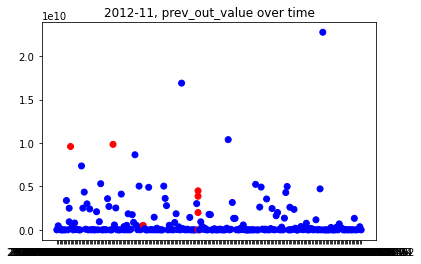

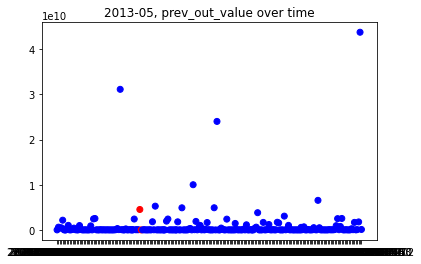

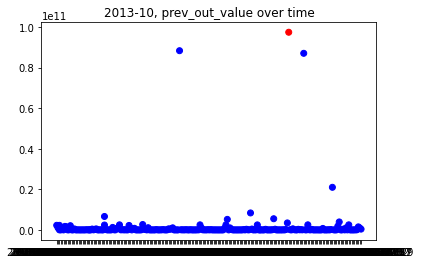

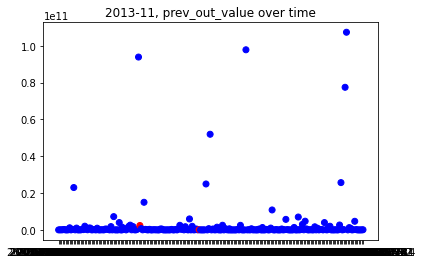

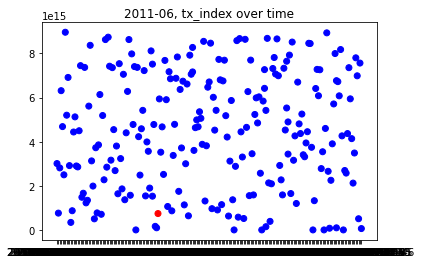

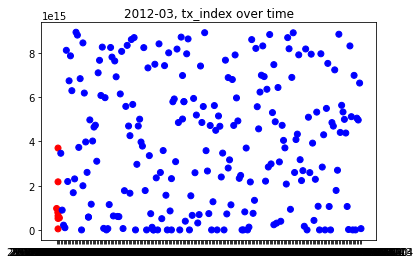

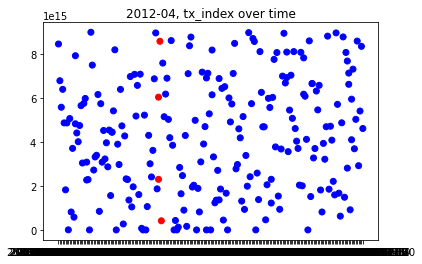

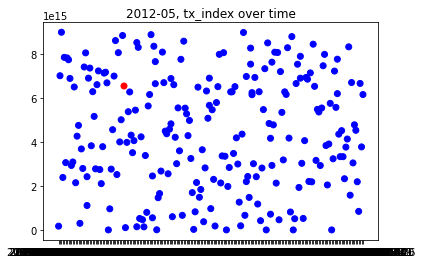

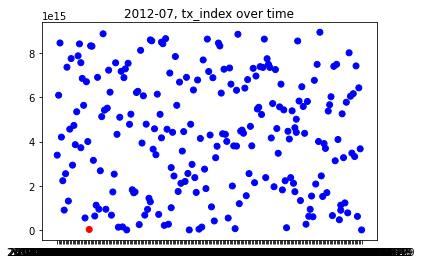

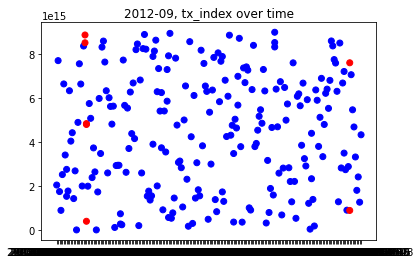

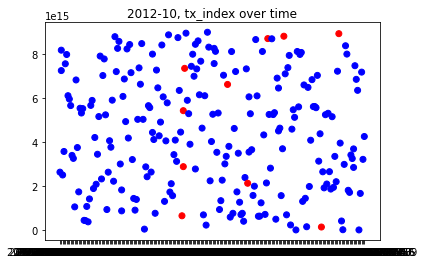

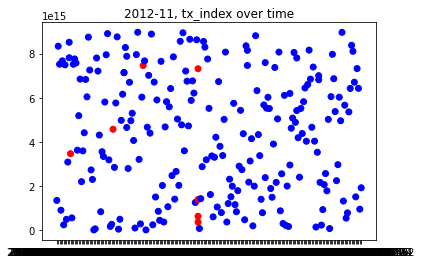

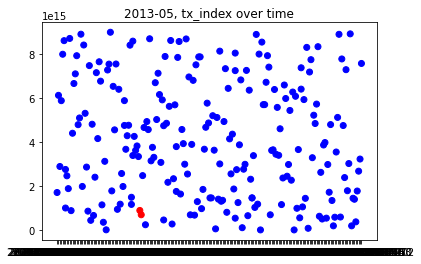

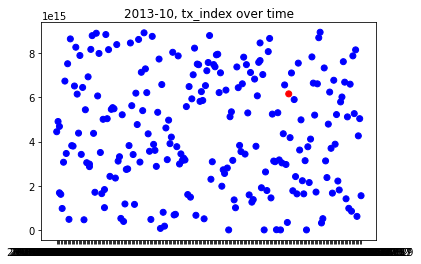

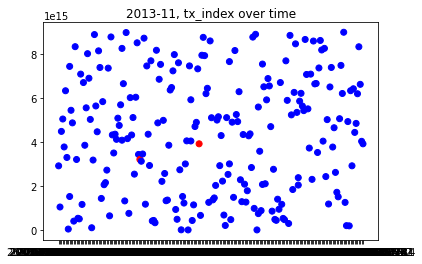

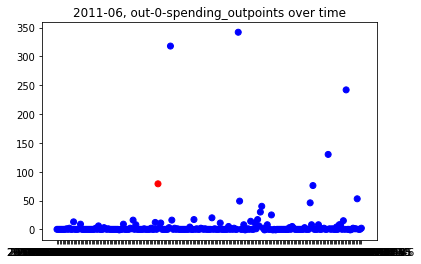

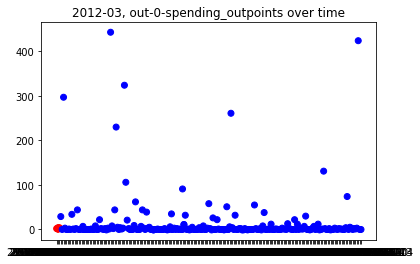

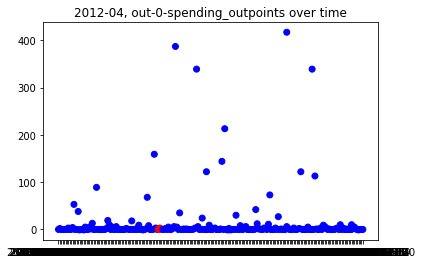

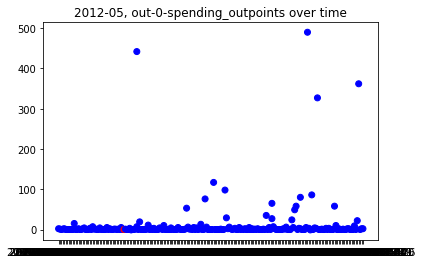

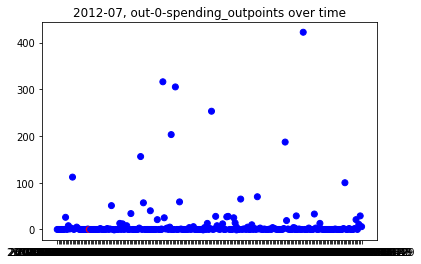

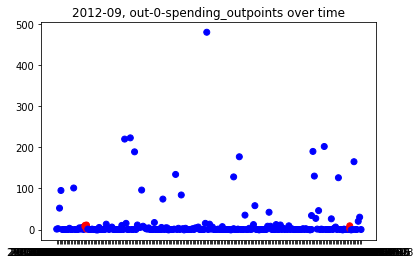

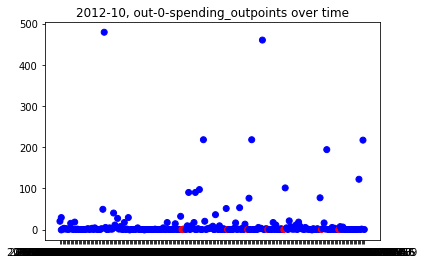

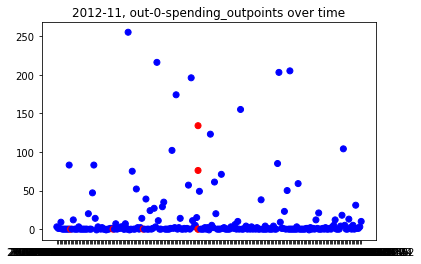

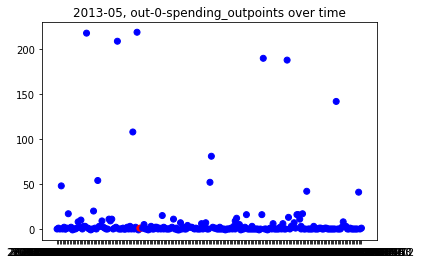

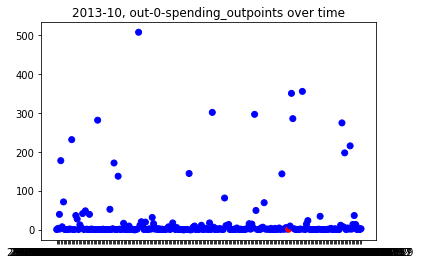

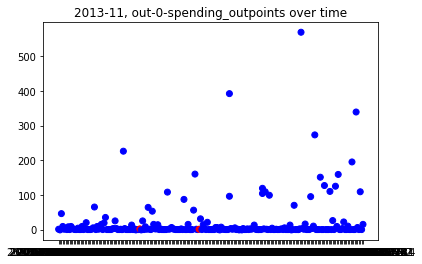

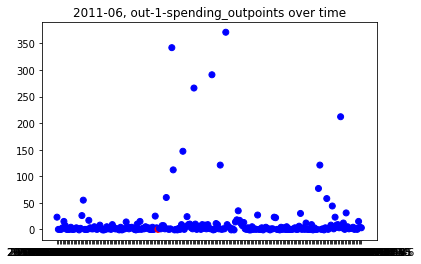

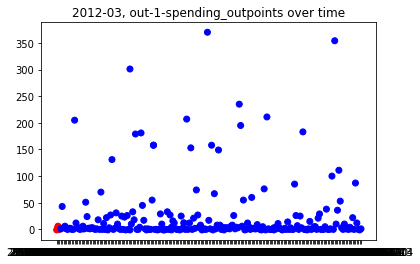

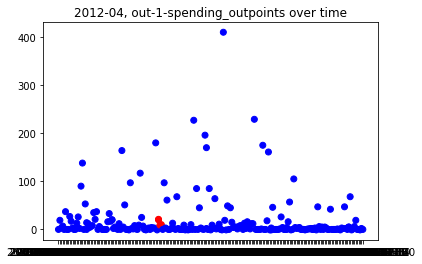

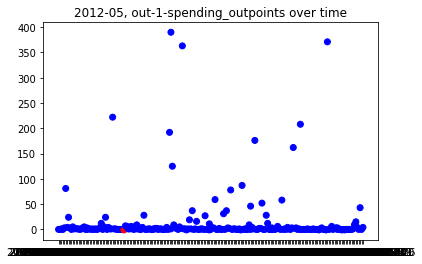

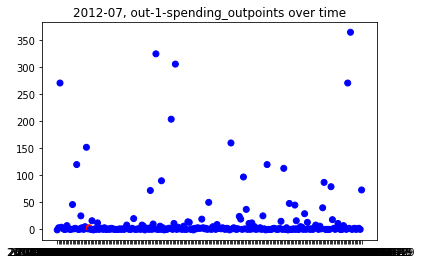

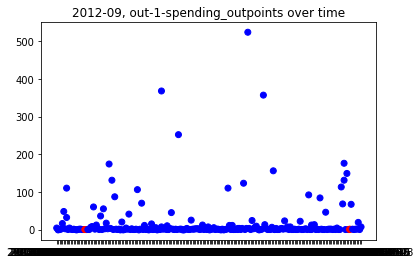

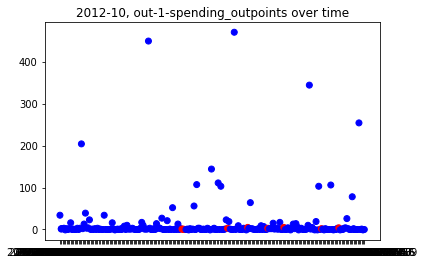

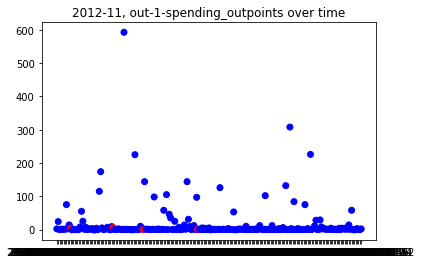

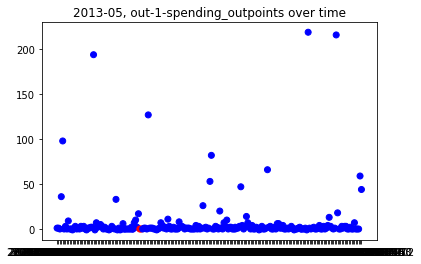

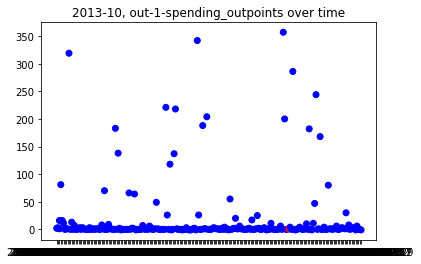

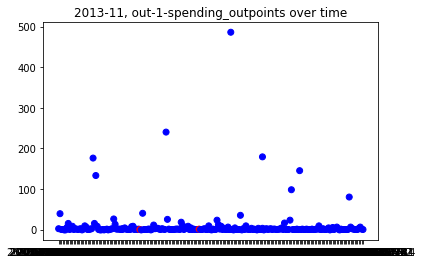

In [14]:
# loop through the data and extract the value in question and 
# feed it into the y-values for the plot
for i in range(len(values)):
 
  # split the date format, yyyy-mm-dd and extract just yyyy-mm
  # this outer for loop must always start from the 0th row
  date = rows[0][-1][:7]
  x = []
  y = []
  j = 0
  colors = []
  while ( j < len(rows) ):
    current_date = rows[j][-1][:7]
    if ( current_date == date ):
      y.append(float(rows[j][i]))
      x.append(rows[j][-1])
      
      # set color based on whether the hash is malicious or not
      if (rows[j][-2] in hashes):
        color = 'red'
      else:
        color = 'blue'
  
      colors.append(color)
      j += 1
    else:
      # create the plot
      plt.scatter(x,y, c=colors)
      plt.title(f"{date}, {values[i]} over time")
      plt.show()
      # reset axes, color, and date
      x = []
      y = []
      colors = []
      date = rows[j][-1][:7]

  # the while loop will end before the final plot is drawn
  # since j will go out of bounds, but the else clause will 
  # not trigger since the last date is constant to the end of the file
  # draw the plot here
  plt.scatter(x,y, c=colors)
  plt.title(f"{date}, {values[i]} over time")
  plt.show()